In [1]:
#import Req Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# 🔹 Load Dataset from Excel File
df = pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")

In [16]:
df.head(19)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [17]:
df.drop(columns=['ID#'], inplace=True)

In [18]:
# Handle Missing Values (if any)
df.fillna(df.median(), inplace=True)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA

In [21]:
# Normalize Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [22]:
# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [23]:
inertia = []
K_range = range(1, 11)

In [24]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)


C:\Users\KARAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\KARAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\KARAN\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\KARAN\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1024, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

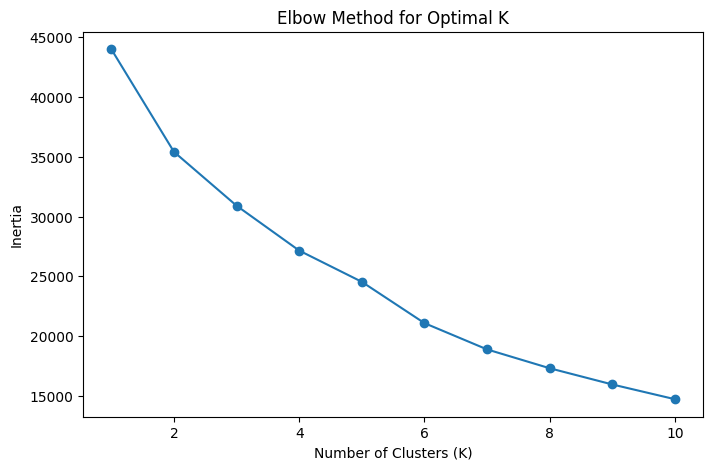

In [25]:
# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [26]:
# Applying K-Means with optimal K
optimal_k = 3  # Adjust based on Elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

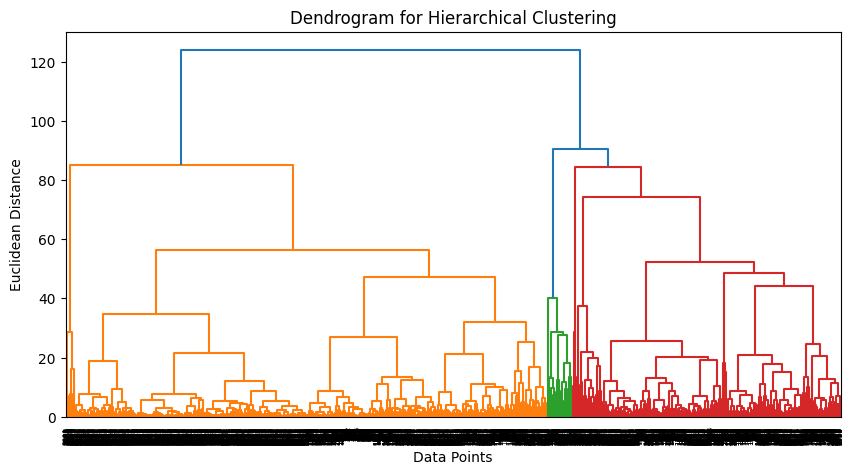

In [27]:
# --- Hierarchical Clustering ---
plt.figure(figsize=(10,5))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [30]:
# Applying Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3,  linkage='ward')
df['Hierarchical_Cluster'] = hierarchical.fit_predict(df_scaled)

In [31]:
# --- DBSCAN Clustering ---
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

In [32]:
# --- Visualization of Clusters ---
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['PC1'], df['PC2'] = df_pca[:,0], df_pca[:,1]

Text(0.5, 1.0, 'K-Means Clusters')

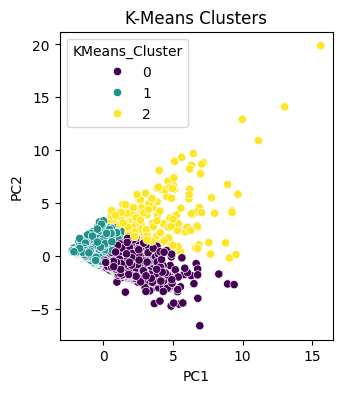

In [34]:
plt.figure(figsize=(12,4))
# K-Means Clustering Visualization
plt.subplot(1,3,1)
sns.scatterplot(x=df['PC1'], y=df['PC2'], hue=df['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clusters')

Text(0.5, 1.0, 'Hierarchical Clusters')

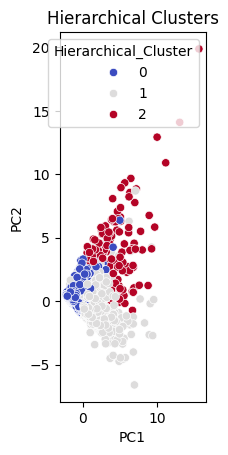

In [35]:
# Hierarchical Clustering Visualization
plt.subplot(1,3,2)
sns.scatterplot(x=df['PC1'], y=df['PC2'], hue=df['Hierarchical_Cluster'], palette='coolwarm')
plt.title('Hierarchical Clusters')

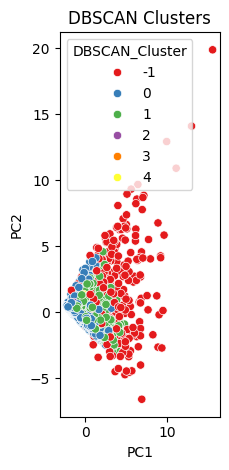

In [41]:
# DBSCAN Clustering Visualization
plt.subplot(1,3,3)
sns.scatterplot(x=df['PC1'], y=df['PC2'], hue=df['DBSCAN_Cluster'], palette='Set1')
plt.title('DBSCAN Clusters')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>